In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pdb
  

In [2]:
df = pd.read_csv("../datasets/stats/stats.csv", sep=';')
df.tail()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct
7749,ORLANDO WIET,ROBERT LUCARELLI,11/03/1994,The Gladiator,-,W,L,KO/TKO,1,2:50,...,12,0,0,50,12,100,0,0,87,0
7750,FRANK HAMAKER,THADDEUS LUSTER,11/03/1994,-,-,W,L,Submission,1,4:52,...,0,0,0,0,50,0,0,0,50,0
7751,JOHNNY RHODES,DAVID LEVICKI,11/03/1994,-,-,W,L,KO/TKO,1,12:13,...,9,0,9,0,9,25,9,50,81,25
7752,PATRICK SMITH,RAY WIZARD,11/03/1994,-,-,W,L,Submission,1,0:58,...,100,0,0,100,0,100,100,0,0,0
7753,SCOTT MORRIS,SEAN DAUGHERTY,11/03/1994,-,-,W,L,Submission,1,0:20,...,0,0,0,0,0,0,100,0,0,0


# Establishing questions

### Here are a few questions I want to be answered by the end of this notebook:
1. What are the most popular locations that UFC hosts its events in?
2. What is the historical average amount of UFC fights hosted annually?
3. What are the top fight outcomes?
4. What are the main fight tactics contributing to a victory?
5. Does being in a particular corner contribute to a victory? (This one is a meme, but we in meme mood today)
6. What fight features contribute to the fight bonuses the most?

# Data preprocessing

### Creating a single *winner* feature instead of two *red_fighter_result* and *blue_fighter_result* features

In [3]:
df.loc[:, 'winner'] = df['red_fighter_result'].apply(lambda x: 'red' if x == 'W' else 'blue')

### Changing columns from *red/blue+feature name* to *winner/loser+feature name*

In [4]:
df.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,winner
0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,...,16,20,24,94,100,0,0,5,0,red
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,...,33,100,0,100,0,0,0,0,100,blue
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,...,16,23,64,90,94,9,5,0,0,red
3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,...,10,7,13,71,69,23,13,5,17,red
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,...,12,18,58,96,97,3,2,0,0,red


In [5]:
def assign_winner_n_loser(df, columns_to_change, winner_col='winner'):
    for col in columns_to_change:
        df.loc[:, f"winner_{col}"] = df[f"red_{col}"].where(df[winner_col] == 'red', df[f"blue_{col}"])
        df.loc[:, f"loser_{col}"] = df[f"red_{col}"].where(df[winner_col] == 'blue', df[f"blue_{col}"])
        
    return df 
        

In [6]:
cols_to_change = ['fighter_name', 'fighter_nickname','fighter_KD',
                  'fighter_sig_str', 'fighter_sig_str_pct', 
                  'fighter_total_str', 'fighter_TD', 'fighter_TD_pct', 
                  'fighter_sub_att', 'fighter_rev', 'fighter_ctrl', 
                  'fighter_sig_str_head', 'fighter_sig_str_body', 
                  'fighter_sig_str_leg', 'fighter_sig_str_distance', 
                  'fighter_sig_str_clinch', 'fighter_sig_str_ground', 
                  'fighter_sig_str_head_pct', 'fighter_sig_str_body_pct', 
                  'fighter_sig_str_leg_pct', 'fighter_sig_str_distance_pct', 
                  'fighter_sig_str_clinch_pct', 'fighter_sig_str_ground_pct']

df = assign_winner_n_loser(df, cols_to_change)
df.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,winner_fighter_sig_str_body_pct,loser_fighter_sig_str_body_pct,winner_fighter_sig_str_leg_pct,loser_fighter_sig_str_leg_pct,winner_fighter_sig_str_distance_pct,loser_fighter_sig_str_distance_pct,winner_fighter_sig_str_clinch_pct,loser_fighter_sig_str_clinch_pct,winner_fighter_sig_str_ground_pct,loser_fighter_sig_str_ground_pct
0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,...,14,16,20,24,94,100,0,0,5,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,...,33,0,0,100,0,100,0,0,100,0
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,...,40,16,23,64,90,94,9,5,0,0
3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,...,23,10,7,13,71,69,23,13,5,17
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,...,44,12,18,58,96,97,3,2,0,0


### Dropping the old features, leaving the new *winner/loser* ones

In [7]:
df = df.loc[:, ['event_date', 'method', 'round', 'time', 'time_format', 
           'referee', 'details', 'bout_type', 'bonus', 'event_name', 'event_location']].join(df.iloc[:, -47:])
df.head()


,event_date,method,round,time,time_format,referee,details,bout_type,bonus,event_name,...,winner_fighter_sig_str_body_pct,loser_fighter_sig_str_body_pct,winner_fighter_sig_str_leg_pct,loser_fighter_sig_str_leg_pct,winner_fighter_sig_str_distance_pct,loser_fighter_sig_str_distance_pct,winner_fighter_sig_str_clinch_pct,loser_fighter_sig_str_clinch_pct,winner_fighter_sig_str_ground_pct,loser_fighter_sig_str_ground_pct
0,26/10/2024,KO/TKO,3,1:34,5 Rnd (5-5-5-5-5),Marc Goddard,Punch to Head At Distance,UFC Featherweight Title Bout,belt,UFC 308: Topuria vs. Holloway,...,14,16,20,24,94,100,0,0,5,0
1,26/10/2024,Submission,1,3:34,5 Rnd (5-5-5-5-5),Jason Herzog,Rear Naked Choke,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,...,33,0,0,100,0,100,0,0,100,0
2,26/10/2024,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Vitor Ribeiro,Sal D'amato 28 - 29. Jacob Montalvo 28 - 29. T...,Light Heavyweight Bout,-,UFC 308: Topuria vs. Holloway,...,40,16,23,64,90,94,9,5,0,0
3,26/10/2024,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,Mike Bell 28 - 29. Ben Cartlidge 28 - 29. Hadi...,Featherweight Bout,-,UFC 308: Topuria vs. Holloway,...,23,10,7,13,71,69,23,13,5,17
4,26/10/2024,KO/TKO,2,4:52,3 Rnd (5-5-5),Kerry Hatley,Spinning Back Fist Head,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,...,44,12,18,58,96,97,3,2,0,0


# Data Cleaning

## NaN values

In [8]:
df.isnull().sum().sum()

np.int64(0)

## Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

We can see that there's no NaNs nor duplicates. Let's go to EDA.

# EDA

## 1. What are the most popular locations that UFC hosts its events in?

Preparing data for plotting (taking the top 10 locations by hosting frequency):

In [10]:
counts = df[['event_name', 'event_location']].drop_duplicates()
counts = counts['event_location'].value_counts()
top_10_locations = counts.nlargest(20)

Plotting:

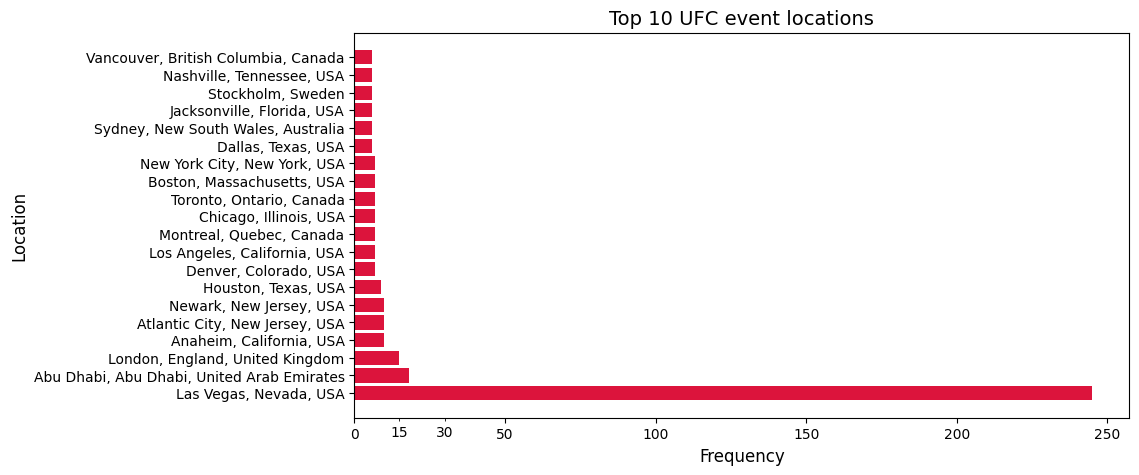

In [11]:
import matplotlib.ticker as ticker

# Main
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(top_10_locations.index, top_10_locations.values, color='#DC143C')
ax.set_title("Top 10 UFC event locations", fontdict={'fontsize': 14})
ax.set_xlabel("Frequency", fontdict={'fontsize': 12})
ax.set_ylabel("Location", fontdict={'fontsize': 12})

# Minor tick labels
ax.xaxis.set_minor_locator(ticker.FixedLocator([15, 30]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter([15, 30]))
plt.show()

In [12]:
# Converting to a % pct format
pct = counts / sum(counts) * 100

# Extracting only the Las Vegas, Nevada, USA
pct = pct[:1]

# Calculating how much % pct is the rest
pct.loc["Others"] = 100 - sum(pct.values)
pct.head()

event_location
Las Vegas, Nevada, USA    34.555712
Others                    65.444288
Name: count, dtype: float64

Looks like *Las Vegas, Nevada, USA* takes up the big most of it.
<br>Let's check out what it looks like in percentages.

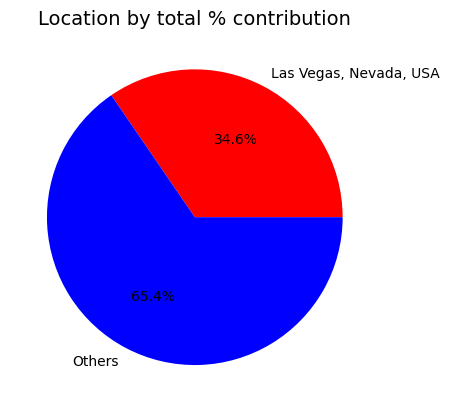

In [13]:
fig, ax = plt.subplots()
ax.pie(pct, labels=pct.index, autopct="%1.1f%%", colors=['red', 'blue'])
ax.set_title("Location by total % contribution", fontdict={'fontsize': 14})
plt.show()

We can see that it, single handedly, takes 34.6% of the total events pool

## 2. What is the historical average amount of UFC fights hosted annually?

Preparing the data for plotting. Dropping duplicates, saving only the annual data and then sorting it.

In [14]:
# Drop
events_annually = df[['event_name', 'event_date']].drop_duplicates()
events_annually['event_date'] = pd.to_datetime(events_annually['event_date'], dayfirst=True).dt.year
events_annually_counts = events_annually['event_date'].value_counts(sort=False)

Let's plot this:

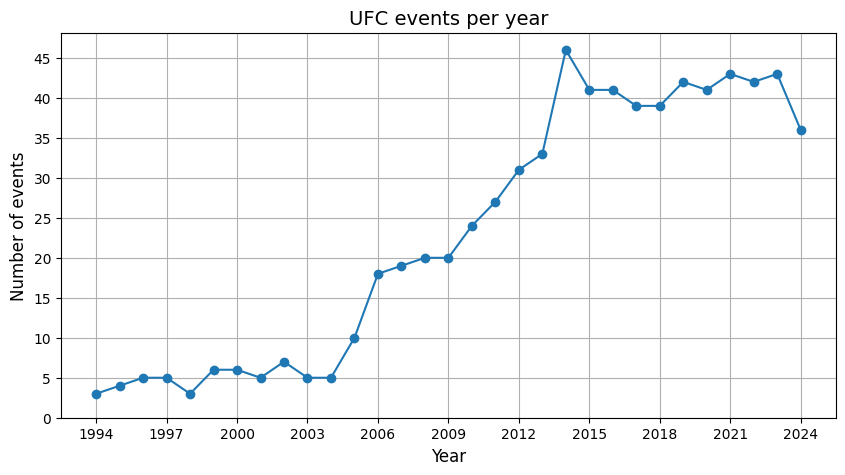

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(events_annually_counts, marker='o')
ax.set_title("UFC events per year", fontdict={'fontsize': 14})
ax.set_xlabel("Year", fontdict={'fontsize': 12})
ax.set_ylabel("Number of events", fontdict={'fontsize': 12})
plt.grid(True)

# Starting from the earliest year, up until now, with a stepping size of 3
ax.set_xticks(range(min(events_annually_counts.index), max(events_annually_counts.index)+1, 3))
# Starting from 0 up until the max frequency, with a steping size of 5
ax.set_yticks(range(0, max(events_annually_counts.values), 5))
plt.show()

We can observe the following:
* The chart starts out with initial steady growth throughout 1995-2005, fluctuating of 2-3 events on average;
* Then we see the rapid growth phase between 2005-2014, reaching a peak in 2014;
* After which throughout 2015-2023 it goes into relative plateau with fluctuations of 2-3 events on average;
* 2024 is still going so we're not going to do any conclusions here just yet.

**Why** the rapid, almost exponential growth in the 2005-2014 stage? Potentially due to the start of adoption of UFC as a sport and looser regulation, to know for sure, we would have to look into more data, which is out of the scope of this dataset.

## 3. What are the top fight outcomes?

Getting the data ready:

In [16]:
top_fight_outcomes = df['method'].value_counts()
top_fight_outcomes

method
Decision - Unanimous       2793
KO/TKO                     2484
Submission                 1550
Decision - Split            750
TKO - Doctor's Stoppage      94
Decision - Majority          60
DQ                           23
Name: count, dtype: int64

Plotting it:

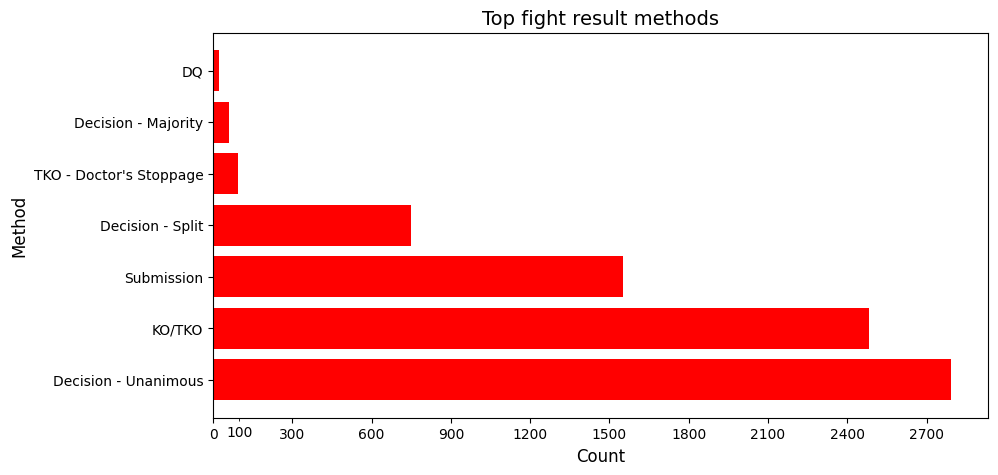

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(top_fight_outcomes.index, top_fight_outcomes.values, color='red')
ax.set_title("Top fight result methods", fontdict={'fontsize': 14})
ax.set_xlabel("Count", fontdict={'fontsize': 12})
ax.set_ylabel("Method", fontdict={'fontsize': 12})

# X ticks (large in minor) configuration
ax.set_xticks(range(0, max(top_fight_outcomes.values), 300))
ax.xaxis.set_minor_locator(ticker.FixedLocator([100]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter([100]))
plt.show()

## 4. What are the main fight tactics contributing to a victory?

## 5. Does being in a particular corner contribute to a victory?

Data:

In [18]:
winners_by_corner = df['winner'].value_counts()
winners_by_corner = winners_by_corner / sum(winners_by_corner) * 100

Let's plot:

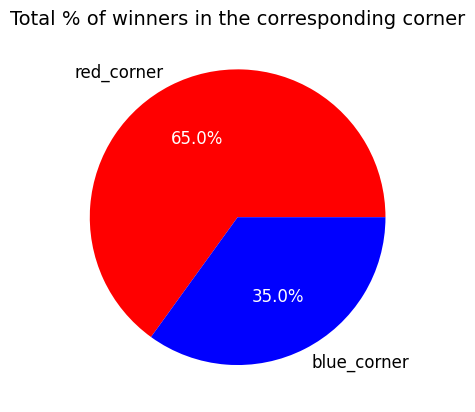

In [19]:
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(winners_by_corner.values, autopct='%.1f%%', labels=['red_corner', 'blue_corner'], colors=['red', 'blue']
      , textprops={'fontsize': 12, 'color': 'black'})

# Changing the autotext color
for autotext in autotexts:
    autotext.set_color('white')
    
ax.set_title("Total % of winners in the corresponding corner", fontdict={'fontsize': 14})
plt.show()

This is actually funny at first glance, but it turns out that red corner is given to champions, and, higher ranked fighters.
<br>Where blue is assigned to lower ranked fighters and title challengers.

## 6. What fight features contribute to the fight bonuses the most?

In [ ]:
!pip install torch

In [ ]:
import torch

foo = torch.tensor((2, 3, 4))

foo